# Model training and evaluation

In [20]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

In [21]:
# metrics for each class + weighted average (- bad impact)
# micro f1 = accuracy
def print_metrics(cls):
    sns.heatmap(metrics.confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
    print('accuracy: ',metrics.accuracy_score(y_test, cls.predict(X_test)))
    print()
    print(metrics.classification_report(y_test, cls.predict(X_test)))
    print('macro precision: ',metrics.precision_score(y_test, cls.predict(X_test), average='macro'))
    print('micro precision: ',metrics.precision_score(y_test, cls.predict(X_test), average='micro'))
    print()
    print('micro recall: ',metrics.recall_score(y_test, cls.predict(X_test), average='micro'))
    print('macro recall: ',metrics.recall_score(y_test, cls.predict(X_test), average='macro'))
    print()
    print('micro f1: ',metrics.f1_score(y_test, cls.predict(X_test), average='micro'))
    print('macro f1: ',metrics.f1_score(y_test, cls.predict(X_test), average='macro'))
    plt.show()

In [26]:
def train_eval(classifier, rand_state = False, **kwargs):
    if rand_state:
        cls = classifier(random_state=16, **kwargs)
    else:
        cls = classifier(**kwargs)
    cls.fit(X_train, y_train)
    print_metrics(cls)

In [ ]:
# prepare original data 
X_train = pd.read_csv('data/split/train.csv', index_col=0)
X_test = pd.read_csv('data/split/test.csv', index_col=0)

X_train = X_train[(X_train['ratio_running_duration'] >= 0) & (X_train['ratio_running_duration'] < 25)]
X_test = X_test[(X_test['ratio_running_duration'] >= 0) & (X_test['ratio_running_duration'] < 25)]

y_train = X_train['class']
y_test = X_test['class']

X_train.drop('class', axis=1, inplace=True)
X_test.drop('class', axis=1, inplace=True)

In [23]:
# prepare transformed data 
X_train = pd.read_csv('data/split/transformed/train.csv', index_col=0)
X_test = pd.read_csv('data/split/transformed/test.csv', index_col=0)

X_train = X_train[(X_train['ratio_running_duration_original'] >= 0) & (X_train['ratio_running_duration_original'] < 25)]
X_test = X_test[(X_test['ratio_running_duration_original'] >= 0) & (X_test['ratio_running_duration_original'] < 25)]

y_train = X_train['class']
y_test = X_test['class']

X_train.drop(['class', 'ratio_running_duration_original'], axis=1, inplace=True)
X_test.drop(['class', 'ratio_running_duration_original'], axis=1, inplace=True)

## Classifiers

accuracy:  0.50986632718

             precision    recall  f1-score   support

          1       0.82      0.62      0.71       655
          2       0.15      0.05      0.08       202
          3       0.31      0.54      0.39       379
          4       0.53      0.52      0.52       335

avg / total       0.55      0.51      0.51      1571

macro precision:  0.451532919442
micro precision:  0.50986632718

micro recall:  0.50986632718
macro recall:  0.436201651554

micro f1:  0.50986632718
macro f1:  0.426602251587


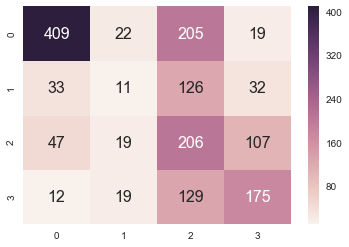

In [27]:
# 0.50986632718
from sklearn.naive_bayes import BernoulliNB
train_eval(BernoulliNB)

accuracy:  0.631444939529

             precision    recall  f1-score   support

          1       0.85      0.85      0.85       655
          2       0.29      0.35      0.32       202
          3       0.46      0.42      0.44       379
          4       0.63      0.62      0.62       335

avg / total       0.64      0.63      0.63      1571

macro precision:  0.557046853242
micro precision:  0.631444939529

micro recall:  0.631444939529
macro recall:  0.558570871523

micro f1:  0.631444939529
macro f1:  0.557025830802


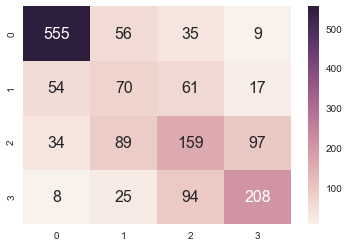

In [28]:
# 0.631444939529
from sklearn.tree import DecisionTreeClassifier
train_eval(DecisionTreeClassifier, True)

accuracy:  0.611712285169

             precision    recall  f1-score   support

          1       0.83      0.85      0.84       655
          2       0.26      0.32      0.29       202
          3       0.45      0.40      0.42       379
          4       0.60      0.57      0.59       335

avg / total       0.62      0.61      0.61      1571

macro precision:  0.534389819489
micro precision:  0.611712285169

micro recall:  0.611712285169
macro recall:  0.533546106197

micro f1:  0.611712285169
macro f1:  0.532706880781


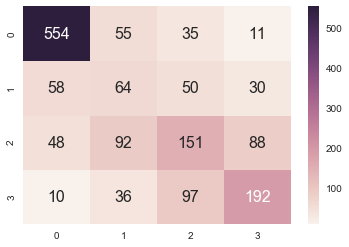

In [29]:
# 0.611712285169
from sklearn.tree import ExtraTreeClassifier
train_eval(ExtraTreeClassifier, True)

accuracy:  0.684914067473

             precision    recall  f1-score   support

          1       0.84      0.95      0.89       655
          2       0.35      0.29      0.32       202
          3       0.53      0.47      0.50       379
          4       0.67      0.64      0.66       335

avg / total       0.66      0.68      0.67      1571

macro precision:  0.596827074109
micro precision:  0.684914067473

micro recall:  0.684914067473
macro recall:  0.588471756971

micro f1:  0.684914067473
macro f1:  0.590409834207


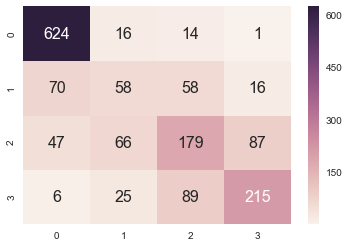

In [30]:
# 0.684914067473
from sklearn.ensemble import ExtraTreesClassifier
train_eval(ExtraTreesClassifier, True)

accuracy:  0.62126034373

             precision    recall  f1-score   support

          1       0.80      0.90      0.85       655
          2       0.30      0.41      0.35       202
          3       0.48      0.28      0.35       379
          4       0.59      0.59      0.59       335

avg / total       0.61      0.62      0.61      1571

macro precision:  0.541107404828
micro precision:  0.62126034373

micro recall:  0.62126034373
macro recall:  0.544206841187

micro f1:  0.62126034373
macro f1:  0.533055352886


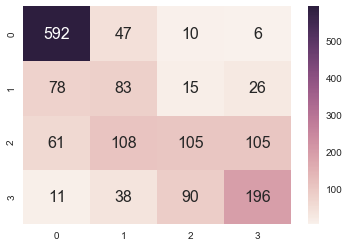

In [32]:
# 0.62126034373
from sklearn.naive_bayes import GaussianNB
train_eval(GaussianNB)

accuracy:  0.520050922979

             precision    recall  f1-score   support

          1       0.59      0.89      0.71       655
          2       0.15      0.10      0.12       202
          3       0.39      0.26      0.31       379
          4       0.62      0.35      0.45       335

avg / total       0.49      0.52      0.48      1571

macro precision:  0.434536127406
micro precision:  0.520050922979

micro recall:  0.520050922979
macro recall:  0.399489652621

micro f1:  0.520050922979
macro f1:  0.396232466865


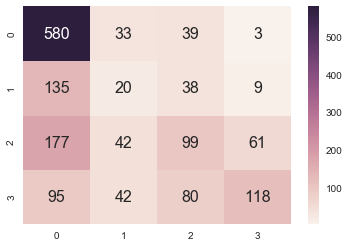

In [34]:
# 0.520050922979
from sklearn.neighbors import KNeighborsClassifier
train_eval(KNeighborsClassifier)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


accuracy:  0.707192870783

             precision    recall  f1-score   support

          1       0.85      0.91      0.88       655
          2       0.38      0.42      0.40       202
          3       0.60      0.47      0.53       379
          4       0.71      0.75      0.73       335

avg / total       0.70      0.71      0.70      1571

macro precision:  0.636521623061
micro precision:  0.707192870783

micro recall:  0.707192870783
macro recall:  0.636654400488

micro f1:  0.707192870783
macro f1:  0.633782633701


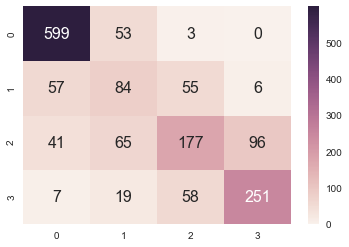

In [36]:
# 0.707192870783
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
train_eval(LinearDiscriminantAnalysis)

accuracy:  0.69318905156

             precision    recall  f1-score   support

          1       0.79      0.98      0.87       655
          2       0.52      0.11      0.19       202
          3       0.59      0.35      0.44       379
          4       0.60      0.87      0.71       335

avg / total       0.67      0.69      0.65      1571

macro precision:  0.624743475593
micro precision:  0.69318905156

micro recall:  0.69318905156
macro recall:  0.578311926241

micro f1:  0.69318905156
macro f1:  0.552573099339


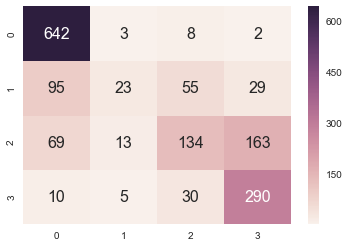

In [37]:
# 0.69318905156
from sklearn.svm import LinearSVC
train_eval(LinearSVC, True, multi_class='crammer_singer')

accuracy:  0.740292807129

             precision    recall  f1-score   support

          1       0.84      0.97      0.90       655
          2       0.59      0.24      0.34       202
          3       0.60      0.59      0.59       379
          4       0.72      0.78      0.75       335

avg / total       0.72      0.74      0.72      1571

macro precision:  0.686670339162
micro precision:  0.740292807129

micro recall:  0.740292807129
macro recall:  0.641476839498

micro f1:  0.740292807129
macro f1:  0.643650450281


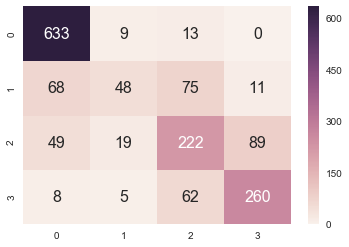

In [38]:
# 0.740292807129
from sklearn.linear_model import LogisticRegression
train_eval(LogisticRegression, True, multi_class='multinomial', solver='newton-cg')

accuracy:  0.743475493316

             precision    recall  f1-score   support

          1       0.84      0.96      0.90       655
          2       0.56      0.30      0.39       202
          3       0.60      0.59      0.60       379
          4       0.74      0.77      0.75       335

avg / total       0.73      0.74      0.73      1571

macro precision:  0.685236057263
micro precision:  0.743475493316

micro recall:  0.743475493316
macro recall:  0.653396654772

micro f1:  0.743475493316
macro f1:  0.658567352759


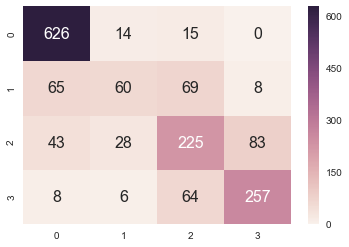

In [40]:
# 0.743475493316
from sklearn.linear_model import LogisticRegressionCV
train_eval(LogisticRegressionCV, True, multi_class='multinomial')

accuracy:  0.727562062381

             precision    recall  f1-score   support

          1       0.85      0.96      0.90       655
          2       0.54      0.24      0.33       202
          3       0.56      0.62      0.59       379
          4       0.73      0.70      0.71       335

avg / total       0.71      0.73      0.71      1571

macro precision:  0.668159623701
micro precision:  0.727562062381

micro recall:  0.727562062381
macro recall:  0.627890658538

micro f1:  0.727562062381
macro f1:  0.632025437262


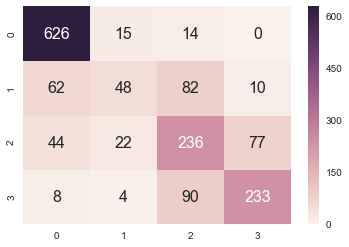

In [41]:
# 0.727562062381
from sklearn.neural_network import MLPClassifier
train_eval(MLPClassifier, True)

accuracy:  0.386378103119

             precision    recall  f1-score   support

          1       0.75      0.44      0.56       655
          2       0.15      0.45      0.22       202
          3       0.34      0.41      0.37       379
          4       0.63      0.21      0.32       335

avg / total       0.55      0.39      0.42      1571

macro precision:  0.468454696798
micro precision:  0.386378103119

micro recall:  0.386378103119
macro recall:  0.378903193235

micro f1:  0.386378103119
macro f1:  0.367734071704


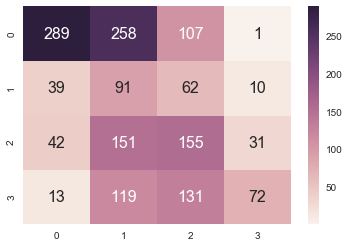

In [43]:
# 0.386378103119
from sklearn.neighbors import NearestCentroid
train_eval(NearestCentroid)

accuracy:  0.594525779758

             precision    recall  f1-score   support

          1       0.81      0.86      0.84       655
          2       0.42      0.17      0.24       202
          3       0.47      0.07      0.12       379
          4       0.42      0.92      0.57       335

avg / total       0.59      0.59      0.53      1571

macro precision:  0.528902070955
micro precision:  0.594525779758

micro recall:  0.594525779758
macro recall:  0.505024246269

micro f1:  0.594525779758
macro f1:  0.443761579516


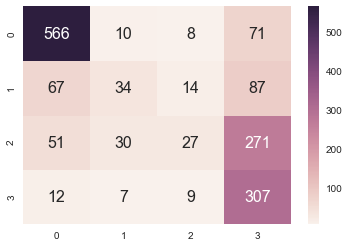

In [45]:
# 0.594525779758
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
train_eval(QuadraticDiscriminantAnalysis)

accuracy:  0.476129853596

             precision    recall  f1-score   support

          1       0.45      1.00      0.62       655
          2       0.00      0.00      0.00       202
          3       0.42      0.02      0.04       379
          4       0.79      0.25      0.38       335

avg / total       0.46      0.48      0.35      1571

macro precision:  0.417261565744
micro precision:  0.476129853596

micro recall:  0.476129853596
macro recall:  0.318709880676

micro f1:  0.476129853596
macro f1:  0.262230776781


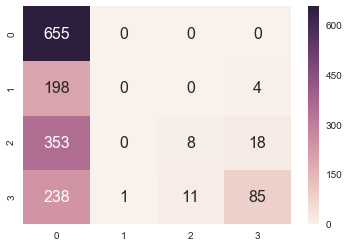

In [52]:
# 0.476129853596
from sklearn.neighbors import RadiusNeighborsClassifier
train_eval(RadiusNeighborsClassifier, radius=3)

accuracy:  0.700827498409

             precision    recall  f1-score   support

          1       0.84      0.96      0.90       655
          2       0.37      0.31      0.34       202
          3       0.55      0.52      0.53       379
          4       0.72      0.64      0.68       335

avg / total       0.68      0.70      0.69      1571

macro precision:  0.619806523069
micro precision:  0.700827498409

micro recall:  0.700827498409
macro recall:  0.606527279162

micro f1:  0.700827498409
macro f1:  0.610829822988


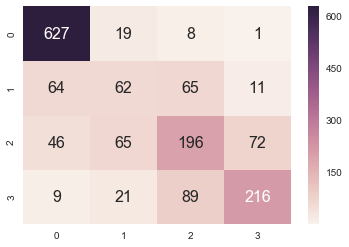

In [53]:
# 0.700827498409
from sklearn.ensemble import RandomForestClassifier
train_eval(RandomForestClassifier, True)

accuracy:  0.682367918523

             precision    recall  f1-score   support

          1       0.74      0.99      0.85       655
          2       0.43      0.04      0.08       202
          3       0.59      0.36      0.45       379
          4       0.62      0.83      0.71       335

avg / total       0.64      0.68      0.62      1571

macro precision:  0.596749290726
micro precision:  0.682367918523

micro recall:  0.682367918523
macro recall:  0.556941478328

micro f1:  0.682367918523
macro f1:  0.523027646995


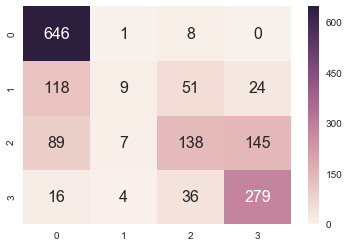

In [54]:
# 0.682367918523
from sklearn.linear_model import RidgeClassifier
train_eval(RidgeClassifier, True)

accuracy:  0.682367918523

             precision    recall  f1-score   support

          1       0.74      0.99      0.85       655
          2       0.43      0.04      0.08       202
          3       0.59      0.36      0.45       379
          4       0.62      0.83      0.71       335

avg / total       0.64      0.68      0.62      1571

macro precision:  0.596749290726
micro precision:  0.682367918523

micro recall:  0.682367918523
macro recall:  0.556941478328

micro f1:  0.682367918523
macro f1:  0.523027646995


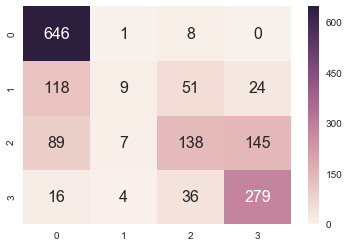

In [56]:
# 0.682367918523
from sklearn.linear_model import RidgeClassifierCV
train_eval(RidgeClassifierCV)

### 1v1

accuracy:  0.64608529599

             precision    recall  f1-score   support

          1       0.82      0.90      0.86       655
          2       0.29      0.35      0.32       202
          3       0.50      0.40      0.45       379
          4       0.68      0.60      0.64       335

avg / total       0.64      0.65      0.64      1571

macro precision:  0.570694433603
micro precision:  0.64608529599

micro recall:  0.64608529599
macro recall:  0.563985609673

micro f1:  0.64608529599
macro f1:  0.564276896409


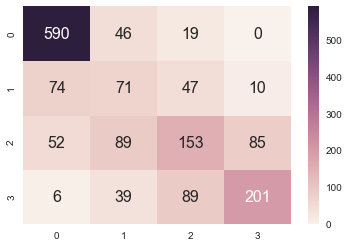

In [58]:
# 0.64608529599
from sklearn.svm import NuSVC
train_eval(NuSVC, True, nu=0.1)

accuracy:  0.682367918523

             precision    recall  f1-score   support

          1       0.75      0.98      0.85       655
          2       0.00      0.00      0.00       202
          3       0.52      0.56      0.54       379
          4       0.71      0.66      0.68       335

avg / total       0.59      0.68      0.63      1571

macro precision:  0.495330263558
micro precision:  0.682367918523

micro recall:  0.682367918523
macro recall:  0.548382240342

micro f1:  0.682367918523
macro f1:  0.517759706939


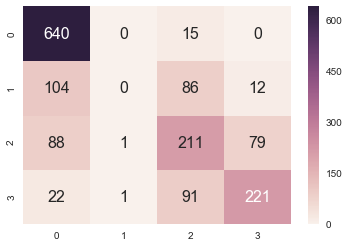

In [59]:
# 0.682367918523
from sklearn.svm import SVC
train_eval(SVC, True)

accuracy:  0.606619987269

             precision    recall  f1-score   support

          1       0.63      0.96      0.76       655
          2       0.14      0.01      0.02       202
          3       0.48      0.35      0.41       379
          4       0.66      0.56      0.60       335

avg / total       0.54      0.61      0.55      1571

macro precision:  0.479516993645
micro precision:  0.606619987269

micro recall:  0.606619987269
macro recall:  0.470233462432

micro f1:  0.606619987269
macro f1:  0.447977478202


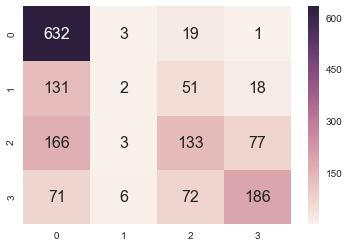

In [60]:
# 0.606619987269
from sklearn.gaussian_process import GaussianProcessClassifier
train_eval(GaussianProcessClassifier, True, multi_class='one_vs_one')

### 1vAll

accuracy:  0.73774665818

             precision    recall  f1-score   support

          1       0.86      0.96      0.91       655
          2       0.46      0.29      0.36       202
          3       0.59      0.60      0.60       379
          4       0.75      0.72      0.74       335

avg / total       0.72      0.74      0.72      1571

macro precision:  0.665320960586
micro precision:  0.73774665818

micro recall:  0.73774665818
macro recall:  0.644106021269

micro f1:  0.73774665818
macro f1:  0.64906765554


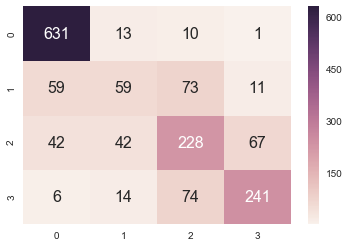

In [63]:
# 0.73774665818
from sklearn.ensemble import GradientBoostingClassifier
train_eval(GradientBoostingClassifier, True)

accuracy:  0.60152768937

             precision    recall  f1-score   support

          1       0.63      0.97      0.76       655
          2       0.22      0.02      0.04       202
          3       0.47      0.30      0.37       379
          4       0.63      0.57      0.60       335

avg / total       0.54      0.60      0.54      1571

macro precision:  0.488743862093
micro precision:  0.60152768937

micro recall:  0.60152768937
macro recall:  0.465711740485

micro f1:  0.60152768937
macro f1:  0.442136817858


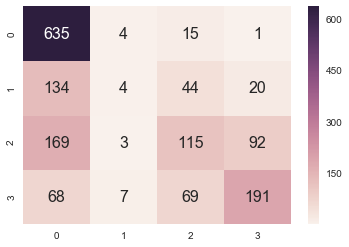

In [64]:
# 0.60152768937
from sklearn.gaussian_process import GaussianProcessClassifier
train_eval(GaussianProcessClassifier, True)

accuracy:  0.711012094208

             precision    recall  f1-score   support

          1       0.83      0.97      0.89       655
          2       0.54      0.10      0.17       202
          3       0.55      0.51      0.53       379
          4       0.64      0.81      0.72       335

avg / total       0.69      0.71      0.67      1571

macro precision:  0.640960826956
micro precision:  0.711012094208

micro recall:  0.711012094208
macro recall:  0.596116445665

micro f1:  0.711012094208
macro f1:  0.57792729891


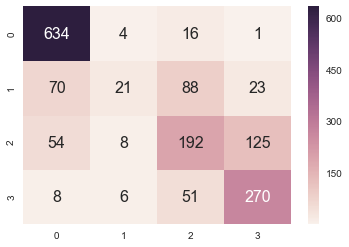

In [65]:
# 0.711012094208
from sklearn.svm import LinearSVC
train_eval(LinearSVC, True, multi_class='ovr')

accuracy:  0.718650541057

             precision    recall  f1-score   support

          1       0.82      0.97      0.89       655
          2       0.55      0.14      0.23       202
          3       0.57      0.51      0.54       379
          4       0.67      0.80      0.73       335

avg / total       0.69      0.72      0.69      1571

macro precision:  0.651793620015
micro precision:  0.718650541057

micro recall:  0.718650541057
macro recall:  0.607735466489

micro f1:  0.718650541057
macro f1:  0.596808847917


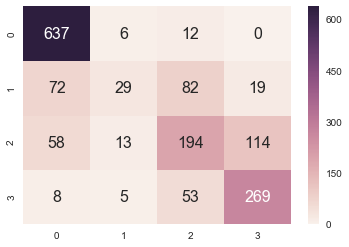

In [66]:
# 0.718650541057
from sklearn.linear_model import LogisticRegression
train_eval(LogisticRegression, True, multi_class='ovr')

accuracy:  0.694462126034

             precision    recall  f1-score   support

          1       0.83      0.98      0.90       655
          2       0.00      0.00      0.00       202
          3       0.51      0.41      0.45       379
          4       0.59      0.88      0.71       335

avg / total       0.60      0.69      0.64      1571

macro precision:  0.483853508152
micro precision:  0.694462126034

micro recall:  0.694462126034
macro recall:  0.566683897077

micro f1:  0.694462126034
macro f1:  0.51552586128


C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


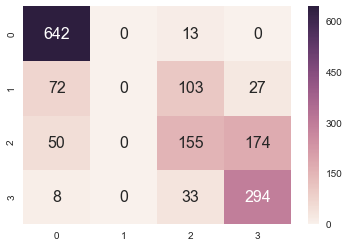

In [67]:
# 0.694462126034
from sklearn.linear_model import LogisticRegressionCV
train_eval(LogisticRegressionCV, True, multi_class='ovr')

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.64863144494

             precision    recall  f1-score   support

          1       0.72      0.99      0.83       655
          2       0.00      0.00      0.00       202
          3       0.55      0.18      0.27       379
          4       0.56      0.90      0.69       335

avg / total       0.55      0.65      0.56      1571

macro precision:  0.455984498269
micro precision:  0.64863144494

micro recall:  0.64863144494
macro recall:  0.518215890477

micro f1:  0.64863144494
macro f1:  0.448778018094


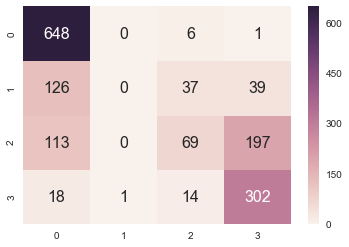

In [68]:
# 0.64863144494
from sklearn.linear_model import SGDClassifier
train_eval(SGDClassifier, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.681731381286

             precision    recall  f1-score   support

          1       0.85      0.92      0.88       655
          2       0.33      0.23      0.27       202
          3       0.50      0.59      0.54       379
          4       0.72      0.59      0.65       335

avg / total       0.67      0.68      0.67      1571

macro precision:  0.601299092841
micro precision:  0.681731381286

micro recall:  0.681731381286
macro recall:  0.583371121115

micro f1:  0.681731381286
macro f1:  0.587188629224


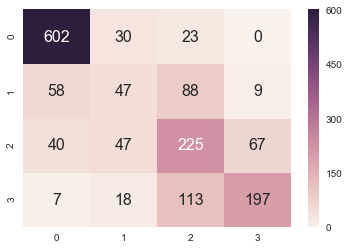

In [69]:
# 0.681731381286
from sklearn.linear_model import Perceptron
train_eval(Perceptron, True)

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy:  0.621896880968

             precision    recall  f1-score   support

          1       0.74      0.99      0.85       655
          2       0.40      0.03      0.06       202
          3       1.00      0.00      0.01       379
          4       0.48      0.95      0.63       335

avg / total       0.70      0.62      0.50      1571

macro precision:  0.652958793858
micro precision:  0.621896880968

micro recall:  0.621896880968
macro recall:  0.494618357116

micro f1:  0.621896880968
macro f1:  0.385190356679


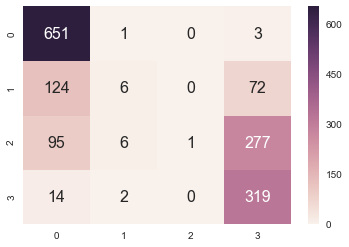

In [70]:
# 0.621896880968
from sklearn.linear_model import PassiveAggressiveClassifier
train_eval(PassiveAggressiveClassifier, True)